In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from dropletsProject.vectorsAndConstants import *
from dropletsProject.utilityFunctions import *
from typing import List
import scipy

In [4]:
df_dead:pd.DataFrame = pd.read_csv(pathDead) 
display(df_dead.head())

k_array_lines_dead:List[dict] = k_array_lines(k_to_try_dead, df_dead, conc_dead)

def keysTail(i:int) -> List[float]:
    return (tail<<fC>>strToFloat)(k_array_lines_dead[i].keys())
def valuesTail(i:int) -> List[float]:
    return (tail<<fC>>list)(k_array_lines_dead[i].values())

,3.33 µM L-DNA,6.67 µM L-DNA,13.33 µM L-DNA,26.67 µM L-DNA,33.33 µM L-DNA
0,0.60366,0.81212,1.31190,5.19043,2.06014
1,0.48342,0.51476,0.54998,13.14452,0.36434
2,1.40835,0.70412,0.31170,0.42626,5.44937
3,NaN,0.38277,0.80640,3.60460,0.27427
4,0.64026,0.61356,1.46189,4.47684,2.43541


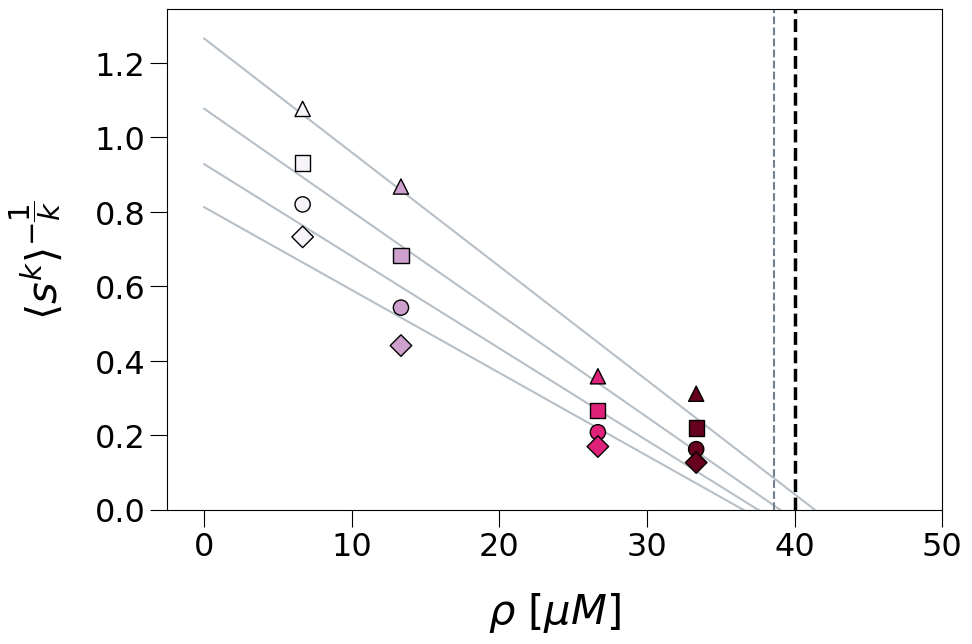

In [6]:
fig, ax = createCanvas()
slopes_dead:dict = {}
intercepts_dead:dict = {}
r_dead:dict = {}
se_dead:dict = {}
x_axis:np.array = np.linspace(0, 50, 1000)
rho_c_dead_list:float = []
var_list_dead:float = []
n_colors = len(concDeadEffective) 
for i in range(len(k_to_try_dead)):
    ax.scatter(keysTail(i), valuesTail(i), label = f'k = {k_to_try_dead[i]}', color = rgbaValuesDead, alpha = 1,\
            marker = markersDead[i], zorder = 4, s = 120, edgecolor = 'black', linewidth = 1)
    slope, intercept, r, _, se = \
    linregress(keysTail(i), valuesTail(i))
    popt, pcov = curve_fit(line, keysTail(i), valuesTail(i))
    var_list_dead.append(varPropagationDead(*(list(popt) + list(np.diag(pcov)))))#
    slopes_dead[k_to_try_dead[i]] = slope
    intercepts_dead[k_to_try_dead[i]] = intercept
    r_dead[k_to_try_dead[i]] = r
    se_dead[k_to_try_dead[i]] = se
    rho_c_dead_list.append(- intercept / slope)
    

    ax.plot(x_axis, slope * x_axis + intercept, label = f'k = {k_to_try_dead[i]} fit', color = 'slategrey',\
        alpha = 0.5)
        

ax.axvline(critical_c_dead, color = 'black', linestyle = '--', label = 'Critical concentration',\
    linewidth = 2.5)

final_rho_c_dead:float = np.mean(rho_c_dead_list)
ax.axvline(final_rho_c_dead, color = 'slategrey', linestyle = '--')
ax.set_ylim(bottom = 0)
ax.set_xlim(right = 50)
ax.tick_params(axis='both', which='major', labelsize=23, length=12) 
ax.set_xlabel('$\\rho$ [$\mu M$]', fontsize = 30, labelpad=20)
_ = ax.set_ylabel('$ \left <  s^{k} \\right >^{-\dfrac{1}{k}} $', fontsize = 30, labelpad=20)
#fig.savefig('../../../Desktop/Fig4A.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../../Desktop/Fig4A.svg', dpi = 300, facecolor = 'white')

In [4]:
y_bar, var = weightedAverage(var_list_dead, rho_c_dead_list)

In [5]:
ratio_arr_list:List[float] = []
ratio_arr_original:List[float] = []
k_mom_list:List[float] = []
k_mom_1_list:List[float] = []
k_mom_std:List[float] = []
k_mom_1_std:List[float] = []
for k in k_to_try_dead:
    k_mom = dict_moment_no_random(df_dead, conc_dead, k)
    k_mom_list.append(k_mom)
    k_mom_std.append(dict_moment_no_random_std(df_dead, conc_dead, k))
    k_1_mom = dict_moment_no_random(df_dead, conc_dead, k+1)
    k_mom_1_list.append(k_1_mom)
    k_mom_1_std.append(dict_moment_no_random_std(df_dead, conc_dead, k+1))

    k_mom_arr = np.array(list(k_mom.values()))
    k_1_mom_arr = np.array(list(k_1_mom.values()))
    ratio_dict = {np.abs((float(conc) - final_rho_c_dead)/final_rho_c_dead): k_1_mom_arr[i] / k_mom_arr[i] \
        for i, conc in enumerate(conc_dead)}
    ratio_arr_list.append(ratio_dict)
    ratio_dict_or = {np.abs((float(conc) - critical_c_dead)/critical_c_dead): k_1_mom_arr[i] / k_mom_arr[i] \
        for i, conc in enumerate(conc_dead)}
    ratio_arr_original.append(ratio_dict_or)



In [6]:
err_dict:dict = {}
for i in range(len(k_to_try_dead)):
    err_dict[k_to_try_dead[i]]:dict = {}
    for conc in conc_dead:
        _, yerr = weightedAverage(k_mom_std[i][conc], k_mom_1_list[i][conc])
        err_dict[k_to_try_dead[i]][conc]:float = yerr

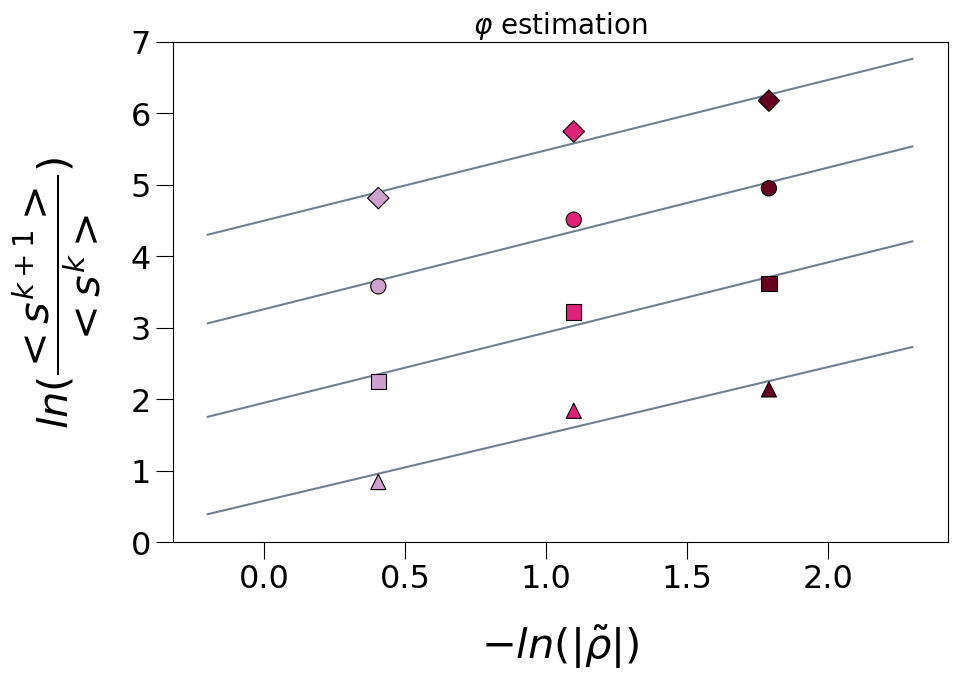

In [7]:
n_colors:int = len(conc_dead_phi)
fig, ax = createCanvas()
x_axis:np.array = np.linspace(-2.3, 0.2, 100)
slope_list:List[float] = []
std_list:List[float] = []
for i, dict_ in enumerate(ratio_arr_original):
     
     
     ax.scatter(-np.log(np.array(tail2(list(dict_.keys())))), np.log(np.exp(i)  * np.array(tail2(list(dict_.values())))),\
                 label = f'k = {k_to_try_dead[i]}', zorder = 4, color = tail(rgbaValuesDead), alpha = 1\
        , marker = markersDead[i], s = 120, edgecolors='black', linewidths = 0.8)
     


     popt, pcov = scipy.optimize.curve_fit(lambda x, a, b: a*x + b, np.log(np.array(tail2(list(dict_.keys())))),\
         np.log(np.exp(i)  * np.array(tail2(list(dict_.values()))))) 
     slope_list.append(popt[0])
     std_list.append(np.sqrt(pcov[0][0]))
     ax.plot(-x_axis, popt[0] * x_axis + popt[1], zorder = 3, alpha = 1, color = 'slategrey')
    
ax.set_ylim(bottom = 0, top = 7)

k_alpha:float = np.sum(1/np.array(std_list)**2)
weighted:float = np.array(std_list).dot(np.array(slope_list)) / np.sum(std_list)
ax.set_xlabel('$-ln(| \\tilde{\\rho} |)$', fontsize = 30, labelpad = 20)  
ax.set_ylabel('$ln( \dfrac{<s^{k+1}>}{<s^{k}>} )$', fontsize=30, labelpad = 20)
ax.tick_params(axis='both', which='major', labelsize=23, length=12)
ax.set_title('$\\varphi$ estimation', fontsize = 20)
plt.show()

#fig.savefig('../../paperPlots/pdfPlots/Fig1AInverted.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../paperPlots/svgPlots/Fig1AInverted.svg', dpi = 300, facecolor = 'white')

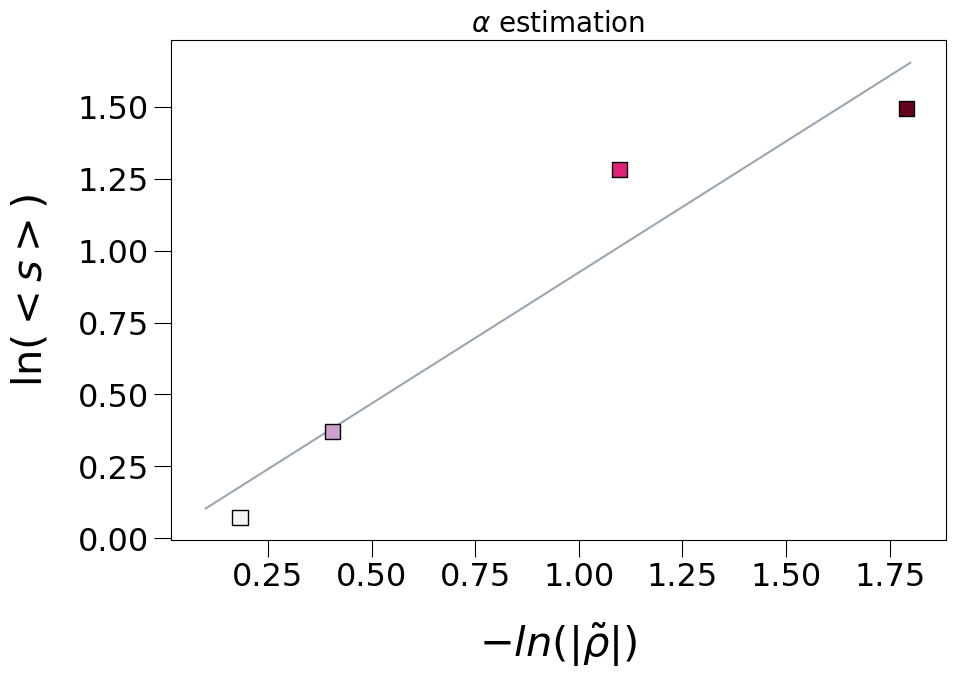

In [8]:
y_axis:np.array = np.log(np.nanmean(df_dead.iloc[:,1:], axis = 0))
x_axis:np.array = np.log(np.abs(tail((np.array(list(k_array_lines_dead[1].keys())).astype(float) - critical_c_dead)/critical_c_dead)))
fig, ax = createCanvas()

n_colors:int = len(concDeadEffective)
ax.scatter(-x_axis, y_axis, zorder = 2, s = 120, edgecolor = 'black', color = rgbaValuesDead, alpha = 1, marker = 's')

ax.set_xlabel('$-ln(| \\tilde{\\rho}|)$', fontsize = 30, labelpad = 20) 
ax.set_ylabel('ln$(< s >)$', fontsize=30, labelpad = 20) 

popt, pcov = scipy.optimize.curve_fit(line, x_axis, y_axis) 


x_axis_line:np.array = np.linspace(-1.8, -0.1)
ax.plot(-x_axis_line, x_axis_line * (popt[0]) + popt[1],\
    zorder = 1, label = 'Line with slope $m=-1$', color = 'slategrey', alpha = 0.7) 

ax.tick_params(axis='both', which='major', labelsize=23, length=12)
_ = ax.set_title('$\\alpha$ estimation', fontsize = 20)

#fig.savefig('../../../Desktop/Fig1B.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../../Desktop/Fig1B.svg', dpi = 300, facecolor = 'white')

## Cumulative analysis

In [9]:
dead_cum_dict:dict = cumDict(df = df_dead, concList=conc_dead)

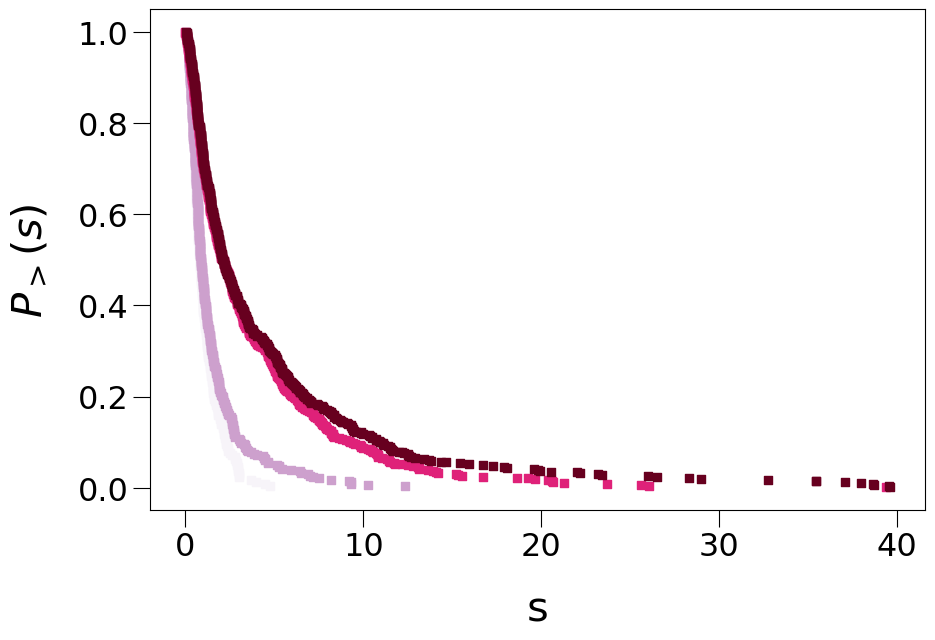

In [11]:
fig, ax = createCanvas()


n_colors = len(concDeadEffective)
for i, conc in enumerate(concDeadEffective):
    ax.scatter(cumulative_data(np.array(df_dead)[:,conc_dead.index(conc)])[0],\
         dead_cum_dict[conc], label = f'$RP_3$, {conc}$\\mu M$', 
         s=35, zorder = 4, color = rgbaValuesDead[i], marker = 's')

ax.tick_params(axis='both', which='major', labelsize=23, length=12)


ax.set_xlabel('s', fontsize = 30, labelpad=20)
_ = ax.set_ylabel('$P_>(s)$', fontsize = 30, labelpad=20)



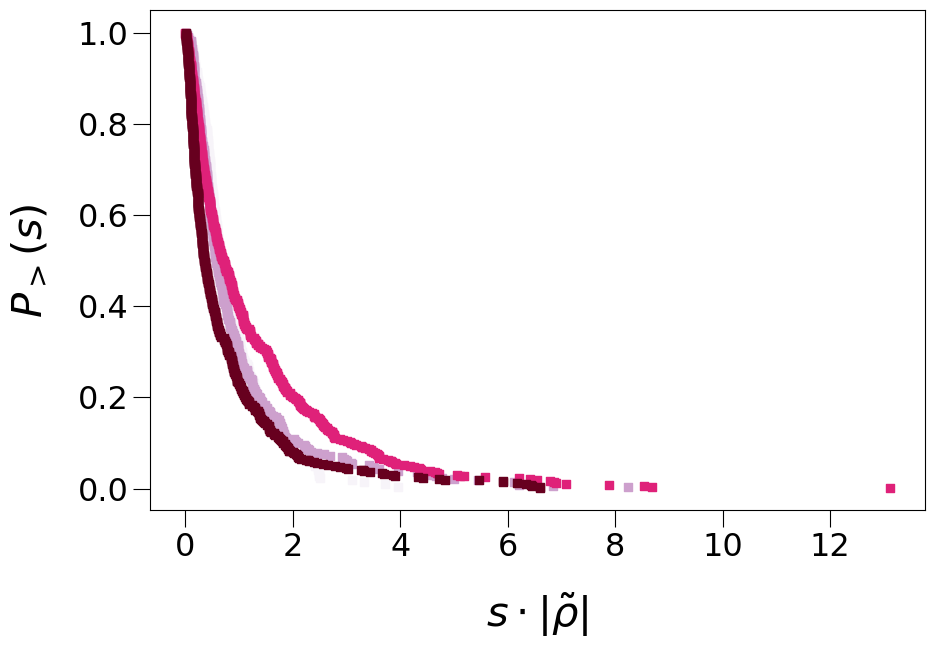

In [12]:
fig, ax = createCanvas()
n_colors = len(concDeadEffective)

for i, conc in enumerate(concDeadEffective):
    ax.scatter(cumulative_data(np.array(df_dead)[:,conc_dead.index(conc)])[0] * \
        np.abs(((float(conc) - critical_c_dead) / critical_c_dead)),\
         dead_cum_dict[conc], label = f'$RP_3$, {conc}$\mu M$',\
             color = rgbaValuesDead[i], marker = 's', s = 35)

ax.tick_params(axis='both', which='major', labelsize=23, length=12)


ax.set_xlabel('$s \cdot |\\tilde{\\rho}|$', fontsize = 30, labelpad = 20)
_ = ax.set_ylabel('$P_>(s)$', fontsize = 30, labelpad = 20)

#fig.savefig('../../paperPlots/pdfPlots/FigS2a.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight')
#fig.savefig('../../paperPlots/svgPlots/FigS2a.svg', dpi = 300, facecolor = 'white')


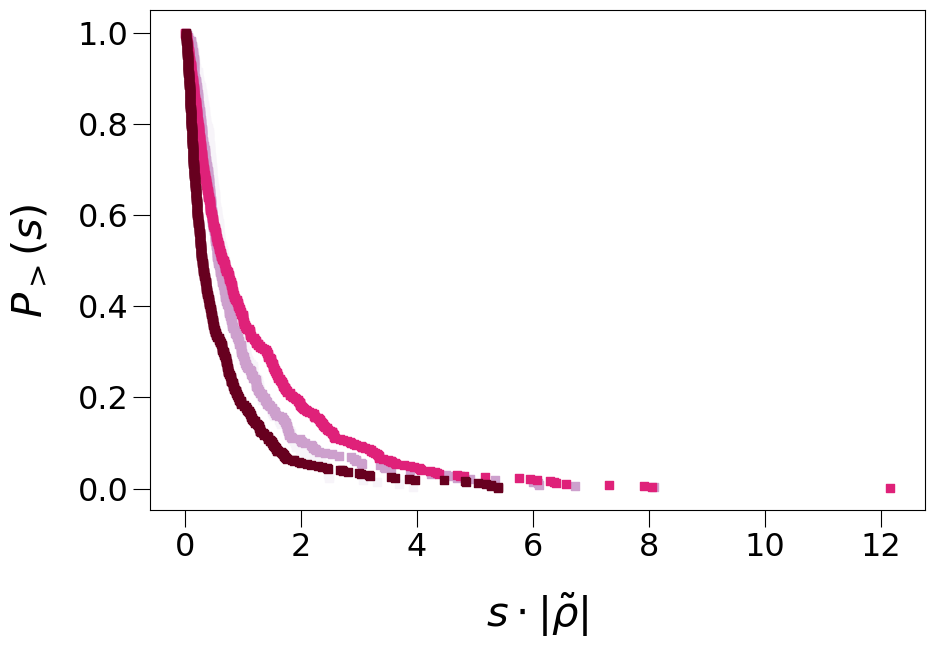

In [13]:
fig, ax = createCanvas()
 
 

for i, conc in enumerate(conc_dead[1:]): 
    ax.scatter(cumulative_data(np.array(df_dead)[:,conc_dead.index(conc)])[0] * \
        np.abs(((float(conc) - final_rho_c_dead) / final_rho_c_dead)),\
            dead_cum_dict[conc], label = f'$RP_3$, {conc}$\\mu M$',\
                zorder = 4, marker = 's', s=35, color = rgbaValuesDead[i]) 
    
 
ax.tick_params(axis='both', which='major', labelsize=23, length=12) 

 
ax.set_xlabel('$s \cdot | \\tilde{\\rho}|$', fontsize = 30 , labelpad=20) 
_ = ax.set_ylabel('$P_>(s)$', fontsize = 30 , labelpad=20) 

 
 
#fig.savefig('../../paperPlots/pdfPlots/FigS2b.pdf', dpi = 300, facecolor = 'white', bbox_inches = 'tight') 
#fig.savefig('../../paperPlots/svgPlots/FigS2b.svg', dpi = 300, facecolor = 'white')